### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [2]:
# your code and solutions
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
orignal_df= pd.read_csv('The E-commerce Dataset.csv')
orignal_df.info


<bound method DataFrame.info of        userId  timestamp                                    review  \
0        4051      12807                 Great job for what it is!   
1        4052     122899               Free Access Worth your Time   
2          33      12700             AOL..I love you!!!!!!!!!!!!     
3          33      21000              EBAY!!!  I LOVE YOU!!!! :-)*   
4          33      22300           Blair Witch...Oh Come On.......   
...       ...        ...                                       ...   
19995   10805      50600                 The Upper Class Fast Food   
19996   10806      82201             What more can you ask for????   
19997   10806      82201          Excellent steak for a good price   
19998   10807      31504                     Different story world   
19999   10808      10200  Boldly Displaying Sigourneys Cleavage ..   

                                                    item  rating  helpfulness  \
0                                             

In [4]:
orignal_df.isnull().sum()

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

In [5]:
df1=orignal_df.dropna()
df1.isnull().sum()


userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64

In [6]:
for x in df1['review'] :
    if x=='none':
      print(x)

none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none


In [7]:
df2=df1.drop(index=df1[df1['review']=='none'].index)
for x in df2['review'] :
    if x=='none':
      print(x)
df2.isnull().sum()    

userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [8]:
# your code and solutions

In [9]:
#Q2.1 total number of unique users, unique reviews, unique items, and unique categories
df2


,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [10]:
pd.value_counts(df2['userId'])
len(df2['userId'].unique())

8562

In [11]:
len(df2['review'].unique())


19459

In [12]:
pd.value_counts(df2['category'])
len(df2['category'].unique())

9

In [13]:
#Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records

In [14]:

print("total number:",len(df2['rating']),"MEAN: ",df2['rating'].mean(),"STD: ",df2['rating'].std(),"Min: ",df2['rating'].min(),"MAX: ",df2['rating'].max())

total number: 19916 MEAN:  3.7017975497087767 STD:  1.4044507218710944 Min:  1.0 MAX:  5.0


In [15]:
#Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders

In [41]:
Males=df2.drop(index=df2[df1['gender']=='F'].index)
Males


C:\Users\Asus\AppData\Local\Temp\ipykernel_20392\63088505.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Males=df2.drop(index=df2[df1['gender']=='F'].index)


,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
10,4054,72401,The King beats the Clown,Burger King,5.0,0.0,M,Restaurants & Gourmet,16,49.00,28
16,4056,12400,get paid to browse-in exchange for watching ads,All Advantage,4.0,0.0,M,Online Stores & Services,1,23.08,12
24,4060,30511,Quicken Loans was quicken easy (pun intended),Quicken Loans,5.0,3.0,M,Personal Finance,57,36.00,11
29,4063,100500,Luvs don't leak,Luvs Ultra Leakguards Stretch,5.0,0.0,M,Kids & Family,38,104.94,6
32,4065,62400,Just shut up and fly,Southwest Airlines,3.0,0.0,M,Hotels & Travel,69,108.69,20
...,...,...,...,...,...,...,...,...,...,...,...
19991,2445,101400,An Okay Movie,What Lies Beneath,2.0,0.0,M,Movies,85,145.00,5
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [17]:
print("total number:",len(Males['rating']),"MEAN: ",Males['rating'].mean(),"STD: ",Males['rating'].std(),"Min: ",Males['rating'].min(),"MAX: ",Males['rating'].max())

total number: 10123 MEAN:  3.6866541539069444 STD:  1.413097727103784 Min:  1.0 MAX:  5.0


In [18]:
Females=df2.drop(index=df2[df1['gender']=='M'].index)
Females

C:\Users\Asus\AppData\Local\Temp\ipykernel_20392\374341592.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Females=df2.drop(index=df2[df1['gender']=='M'].index)


,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19969,10803,102599,The best,Earthlink,5.0,4.0,F,Online Stores & Services,23,68.00,20
19992,10805,11900,R.I.P,MTV,1.0,4.0,F,Media,39,138.00,18
19993,10805,12000,Leave them be...,Teletubbies,5.0,4.0,F,Kids & Family,76,48.25,18
19994,10805,50500,"Thank you, Drive Thru Please",McDonald's,3.0,3.0,F,Restaurants & Gourmet,41,30.74,18


In [19]:
print("total number:",len(Females['rating']),"MEAN: ",Females['rating'].mean(),"STD: ",Females['rating'].std(),"Min: ",Females['rating'].min(),"MAX: ",Females['rating'].max())

total number: 9793 MEAN:  3.71745124068212 STD:  1.3953554048259325 Min:  1.0 MAX:  5.0


In [20]:
#Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items

In [21]:
print(df2.groupby(['item'])['rating'].min())
print(df2.groupby(['item'])['rating'].max())
print(df2.groupby(['item'])['rating'].mean())
print(df2.groupby(['item'])['rating'].std())




item
AOL (America Online)     1.0
All Advantage            1.0
Alta Vista (by 1stUp)    1.0
Amazon.com               1.0
American Airlines        1.0
                        ... 
Wendy's                  1.0
What Lies Beneath        1.0
X-Men                    1.0
X.com                    1.0
eBay                     1.0
Name: rating, Length: 89, dtype: float64
item
AOL (America Online)     5.0
All Advantage            5.0
Alta Vista (by 1stUp)    5.0
Amazon.com               5.0
American Airlines        5.0
                        ... 
Wendy's                  5.0
What Lies Beneath        5.0
X-Men                    5.0
X.com                    5.0
eBay                     5.0
Name: rating, Length: 89, dtype: float64
item
AOL (America Online)     2.500532
All Advantage            3.412481
Alta Vista (by 1stUp)    3.541401
Amazon.com               3.683333
American Airlines        3.054054
                           ...   
Wendy's                  3.971429
What Lies Beneath        3.

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

(array([1, 2]), [Text(1, 0, 'F'), Text(2, 0, 'M')])

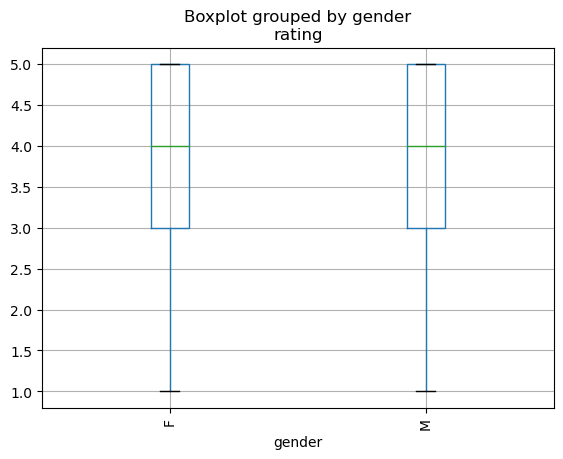

In [42]:
# gender-rating correlation 
df2.boxplot("rating", by="gender") 
plt.xticks(rotation=90)


(array([1, 2, 3, 4, 5]),
 [Text(1, 0, '0.0'),
  Text(2, 0, '1.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '3.0'),
  Text(5, 0, '4.0')])

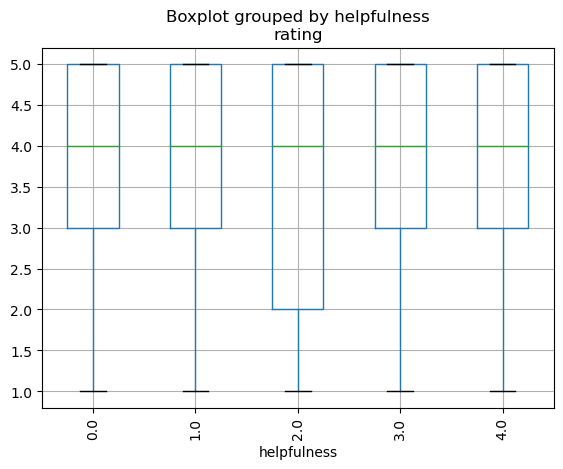

In [23]:
#helpfulness-rating correlation 
df2.boxplot("rating", by="helpfulness") 
plt.xticks(rotation=90)

In [24]:
# your code and solutions

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [25]:
# your code and solutions

In [26]:
remove_outlier_df = df2.drop(index=df2[df2['helpfulness']<=2].index)

remove_outlier_df

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
6,33,32100,Go down under Mateys!!!!!,Outback Steakhouse,5.0,4.0,F,Restaurants & Gourmet,50,25.00,31
9,4053,22304,The best on the web.,Amazon.com,5.0,3.0,F,Online Stores & Services,3,129.82,22
...,...,...,...,...,...,...,...,...,...,...,...
19992,10805,11900,R.I.P,MTV,1.0,4.0,F,Media,39,138.00,18
19993,10805,12000,Leave them be...,Teletubbies,5.0,4.0,F,Kids & Family,76,48.25,18
19994,10805,50500,"Thank you, Drive Thru Please",McDonald's,3.0,3.0,F,Restaurants & Gourmet,41,30.74,18
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18


In [27]:
#users who rate less than 7 items
Ratings=(remove_outlier_df.groupby(['userId']).agg({'rating':'count'}))
Ratings


,rating
userId,
0,3
1,1
2,2
3,2
4,7
...,...
10802,2
10803,1
10804,1


In [28]:
Ratings.drop(index=Ratings[Ratings['rating']<=7].index)

,rating
userId,
50,9
56,13
74,12
75,19
134,28
...,...
10619,10
10661,13
10708,8


In [29]:

IDS=(Ratings.drop(index=Ratings[Ratings['rating']>7].index)).index
IDS

Int64Index([    0,     1,     2,     3,     4,     7,     8,     9,    11,
               12,
            ...
            10796, 10798, 10799, 10800, 10801, 10802, 10803, 10804, 10805,
            10806],
           dtype='int64', name='userId', length=6344)

In [30]:
removed_df = remove_outlier_df.drop(index=remove_outlier_df[remove_outlier_df['userId'].isin(IDS)].index)

removed_df

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
19983,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
19985,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
19988,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
19989,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


In [31]:
removed_df.groupby(['item']).agg({'rating':'count'})

,rating
item,
AOL (America Online),73
All Advantage,56
Alta Vista (by 1stUp),6
Amazon.com,17
American Airlines,14
...,...
Wendy's,28
What Lies Beneath,25
X-Men,37


In [39]:
Items=(removed_df.drop(index=removed_df[removed_df['rating']>11].index)).index
Items

Int64Index([   78,    80,    81,    82,    83,    84,    85,    86,    87,
               88,
            ...
            19912, 19975, 19976, 19977, 19978, 19983, 19985, 19988, 19989,
            19990],
           dtype='int64', length=2209)

In [40]:
items_df = removed_df.drop(index=removed_df[removed_df['userId'].isin(Items)].index)

items_df



,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
19983,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
19985,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
19988,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
19989,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


In [43]:
items_df.to_csv('The_Filtered_E-commerce_Dataset_name.csv')